<a href="https://colab.research.google.com/github/yuvalgrossman/EquSolve/blob/master/detect_from_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd content
import os
if not os.path.isdir('EquSolve'):
  !git clone http://github.com/yuvalgrossman/EquSolve
  %cd EquSolve
else:
  %cd EquSolve
  !git pull

[Errno 2] No such file or directory: 'content'
/content
Cloning into 'EquSolve'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 158 (delta 58), reused 74 (delta 18), pack-reused 0
Receiving objects: 100% (158/158), 20.91 MiB | 26.37 MiB/s, done.
Resolving deltas: 100% (58/58), done.
/content/EquSolve


In [3]:
from Utils.symbols_seperation import *
import cv2
import numpy as np
import matplotlib.pyplot as plt

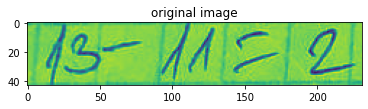

In [4]:
data_path = 'DataSets/hand_written_eqs/'
fn = data_path + 'single_eq1.jpg'
img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.title('original image');

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


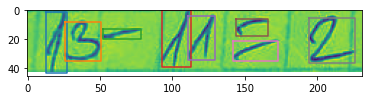

In [5]:
# first lets find the connected components below some threshold:
cc = find_cc(img, threshold=150)
plot_detections(img, cc)

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


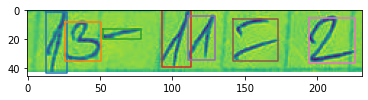

In [6]:
cc = find_cc(img, threshold=150)
cc = unite_symbols_with_gap(cc)
plot_detections(img, cc)

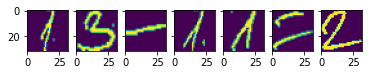

In [7]:
c = crop_resize((img<160).astype('uint8'), cc)
fig, ax = plt.subplots(1,len(c), sharey=True)
[ax[i].imshow(c[i]) for i in range(len(c))]
plt.show()

In [11]:
from Classifier.Detector import Detector

config = {}
config['model_path'] = 'Classifier/TrainResults/Train_Results_2020-08-27_11-28-41/HASY_simpleclassifier.pth'
config['symbol_list_path'] = 'DataSets/HASY/symbols.csv'

theClassifier = Detector(config)

detected_symbols = theClassifier.Detect(c)

print(detected_symbols)

init detector
cuda:0
['\\blacksquare', '\\sun', '\\%', '\\blacksquare', '\\blacksquare', '\\blacksquare', '\\blacksquare']


In [14]:
def detect_symbols_from_image(img_fn):
    img = cv2.imread(img_fn, cv2.IMREAD_GRAYSCALE)
    cc = find_cc(img, 160)
    cc = unite_symbols_with_gap(cc)
    c = crop_resize((img < 160).astype('uint8'), cc)
    return theClassifier.Detect(c)

detect_symbols_from_image('DataSets/hand_written_eqs/single_eq3.jpg')

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


['\\blacksquare',
 '\\blacksquare',
 '\\blacksquare',
 '\\blacksquare',
 '\\blacksquare']